### Research Question
A Kenyan entrepreneur has created an online cryptography course and would want to advertise it on her blog. She currently targets audiences originating from various countries. In the past, she ran ads to advertise a related course on the same blog and collected data in the process. She would now like to employ your services as a Data Science Consultant to help her identify which individuals are most likely to click on her ads.

In order to work on the above problem, you need to do the following:
1. Define the question, the metric for success, the context, experimental design taken and the appropriateness of the available data to answer the given question
2. Find and deal with outliers, anomalies, and missing data within the dataset.
3. Perform univariate and bivariate analysis recording your observations.
4. Implement the solution by performing the respective analysis i.e. factor analysis, principal component analysis, and discriminant analysis.
5. Challenge your solution by providing insights on how you can make improvements.


#### Load the dataset

In [106]:
# load the dataset
adv<- read.csv("advertising.csv")

In [107]:
# View the first 6 rows of the dataset
head(adv)

Daily.Time.Spent.on.Site,Age,Area.Income,Daily.Internet.Usage,Ad.Topic.Line,City,Male,Country,Timestamp,Clicked.on.Ad
68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
59.99,23,59761.56,226.74,Sharable client-driven software,Jamieberg,1,Norway,2016-05-19 14:30:17,0


#### Explore the dataset
Summary, information and dimension

In [108]:
# Summary of the dataset
summary(adv)

 Daily.Time.Spent.on.Site      Age         Area.Income    Daily.Internet.Usage
 Min.   :32.60            Min.   :19.00   Min.   :13996   Min.   :104.8       
 1st Qu.:51.36            1st Qu.:29.00   1st Qu.:47032   1st Qu.:138.8       
 Median :68.22            Median :35.00   Median :57012   Median :183.1       
 Mean   :65.00            Mean   :36.01   Mean   :55000   Mean   :180.0       
 3rd Qu.:78.55            3rd Qu.:42.00   3rd Qu.:65471   3rd Qu.:218.8       
 Max.   :91.43            Max.   :61.00   Max.   :79485   Max.   :270.0       
                                                                              
                                 Ad.Topic.Line              City    
 Adaptive 24hour Graphic Interface      :  1   Lisamouth      :  3  
 Adaptive asynchronous attitude         :  1   Williamsport   :  3  
 Adaptive context-sensitive application :  1   Benjaminchester:  2  
 Adaptive contextually-based methodology:  1   East John      :  2  
 Adaptive demand-driven

In [109]:
# information about the dataset
str(adv)

'data.frame':	1000 obs. of  10 variables:
 $ Daily.Time.Spent.on.Site: num  69 80.2 69.5 74.2 68.4 ...
 $ Age                     : int  35 31 26 29 35 23 33 48 30 20 ...
 $ Area.Income             : num  61834 68442 59786 54806 73890 ...
 $ Daily.Internet.Usage    : num  256 194 236 246 226 ...
 $ Ad.Topic.Line           : Factor w/ 1000 levels "Adaptive 24hour Graphic Interface",..: 92 465 567 904 767 806 223 724 108 455 ...
 $ City                    : Factor w/ 969 levels "Adamsbury","Adamside",..: 962 904 112 940 806 283 47 672 885 713 ...
 $ Male                    : int  0 1 0 1 0 1 0 1 1 1 ...
 $ Country                 : Factor w/ 237 levels "Afghanistan",..: 216 148 185 104 97 159 146 13 83 79 ...
 $ Timestamp               : Factor w/ 1000 levels "2016-01-01 02:52:10",..: 440 475 368 57 768 690 131 334 549 942 ...
 $ Clicked.on.Ad           : int  0 0 0 0 0 0 0 1 0 0 ...


In [110]:
# dimension of the dataset
dim(adv)


[1] 1000   10

The dataset has 1000 rows and 10 columns

#### Data Cleaning

##### Missing Values

In [111]:
# Total missing values in each column 
# by using the function colSums()

colSums(is.na(adv))

Daily.Time.Spent.on.Site                      Age              Area.Income 
                       0                        0                        0 
    Daily.Internet.Usage            Ad.Topic.Line                     City 
                       0                        0                        0 
                    Male                  Country                Timestamp 
                       0                        0                        0 
           Clicked.on.Ad 
                       0

The dataset has no missing values

##### Duplicated rows

In [112]:
# duplicated rows in the dataset df 
# and assign to a variable duplicated_rows

duplicated_rows <- adv[duplicated(adv),]

# Lets print out the variable duplicated_rows and see these duplicated rows 

duplicated_rows

Daily.Time.Spent.on.Site,Age,Area.Income,Daily.Internet.Usage,Ad.Topic.Line,City,Male,Country,Timestamp,Clicked.on.Ad


There are no duplicated rows in the dataset

##### Outliers

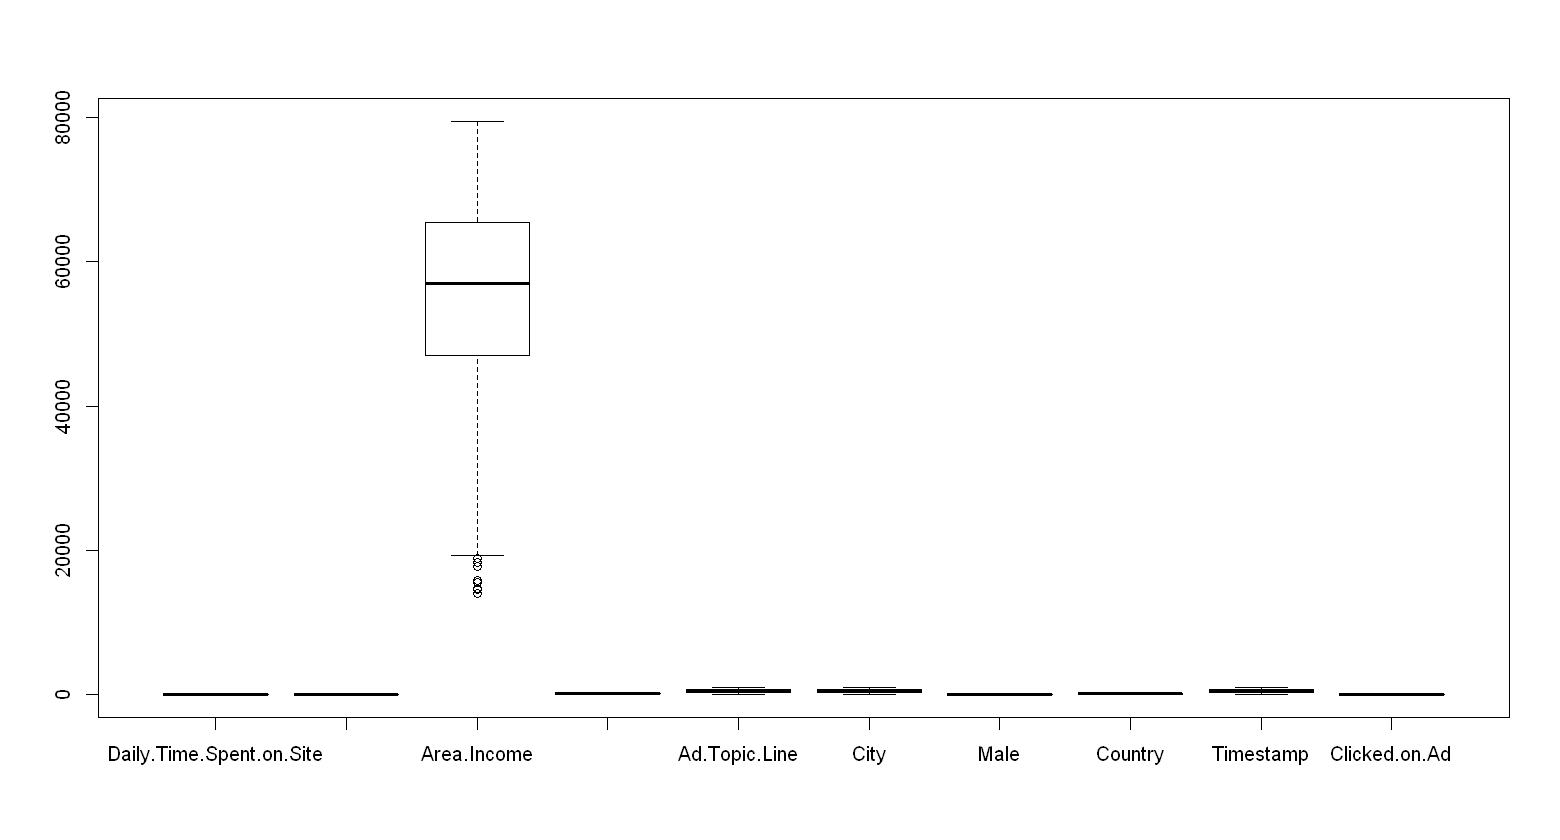

In [113]:
boxplot(adv)

We identify outliers in the Area.Income column We can narrow down to list out the outliers in that column

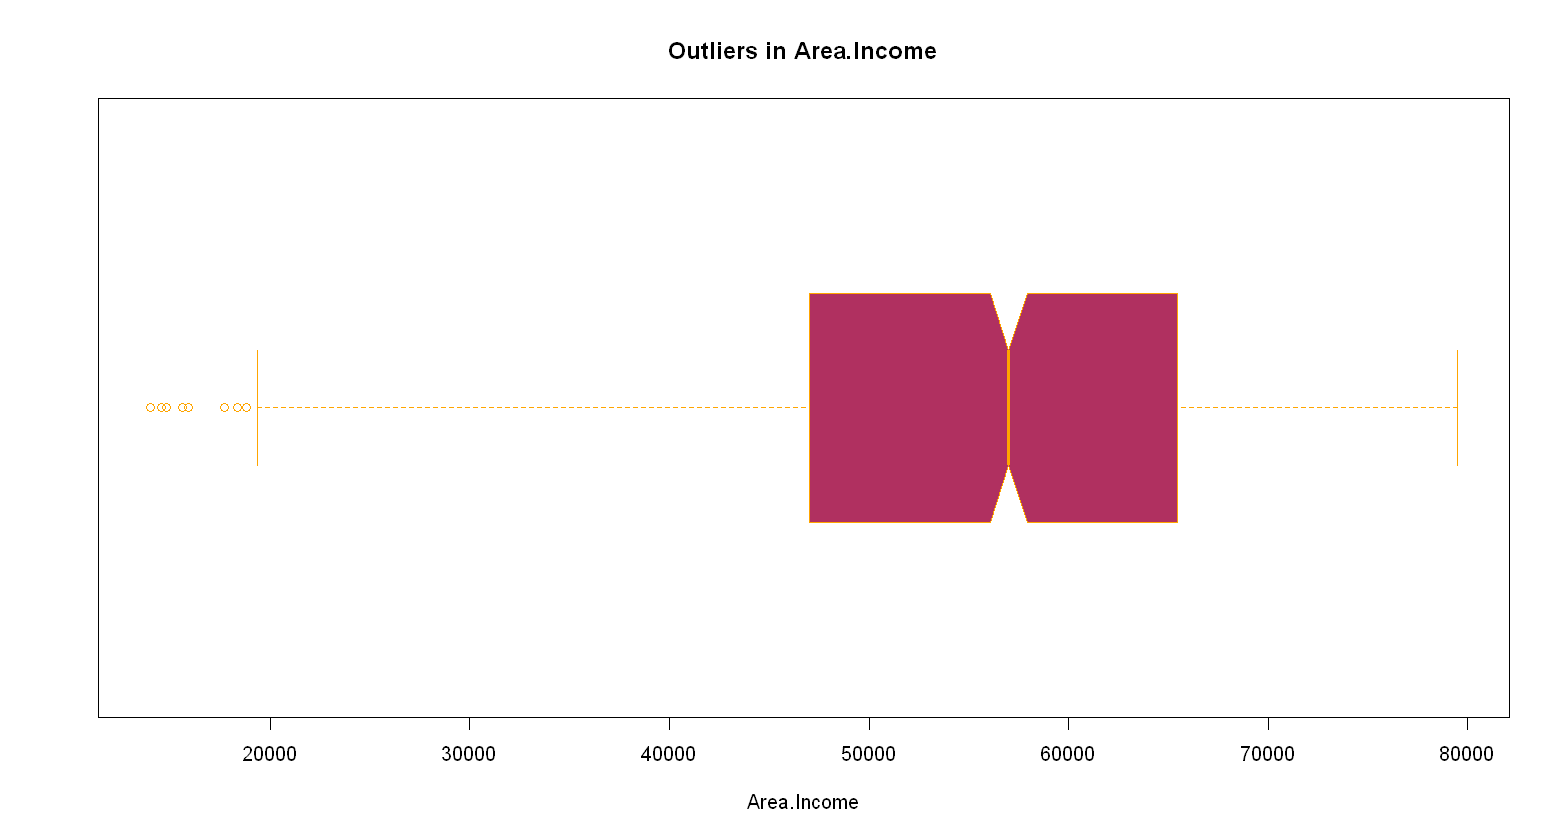

In [114]:
boxplot(adv$Area.Income,
main = "Outliers in Area.Income",
xlab = "Area.Income",
col = "maroon",
border = "orange",
horizontal = TRUE,
notch = TRUE
)

After further investigation we conclude not to drop any outliers because they show key values in that column

<b>Changing variables into the correct data types</b>

In [115]:
# Converting the variables into the correct data types.  
# Converting variables into string
a = c("Ad.Topic.Line", "City", "Country")
for (i in a) {
    adv[, i] = as.character(adv[, i])
}

In [116]:
# converting variables into factors
b = c("Male", "Clicked.on.Ad")
for (i in b) {
    adv[, i] = as.factor(adv[, i])
}

In [117]:
# Convering timestamp to appropriate datatype.  
# The strptime command is used to take a string and convert it into a time data type.
adv$Timestamp = strptime(adv$Timestamp, "%Y-%m-%d %H:%M:%S")

#### Exploratory Data Analysis

##### Univariate Analysis

In [118]:
table(adv$Age)


19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 
 6  6  6 13 19 21 27 37 33 48 48 39 60 38 43 39 39 50 36 37 30 36 32 26 23 21 
45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 
30 18 13 16 18 20 12 15 10  9  7  2  6  4  2  4  1 

Most of the people in the dataset are 31 years with 60 people

In [119]:
# mean of the daily time spent on site
mean(adv$Daily.Time.Spent.on.Site)

[1] 65.0002

65 minutes is the average time spent on site

In [120]:
# mean daily internet usage
mean(adv$Daily.Internet.Usage)

[1] 180.0001

180 minutes is the average daily internet usage

###### Histograms

In [121]:
# Histograms
library(DataExplorer)
plot_histogram(adv)

ERROR: Error in setDT(ans, key = key): Column 9 is of POSIXlt type. Please convert it to POSIXct using as.POSIXct and run setDT again. We do not recommend use of POSIXlt at all because it uses 40 bytes to store one date.


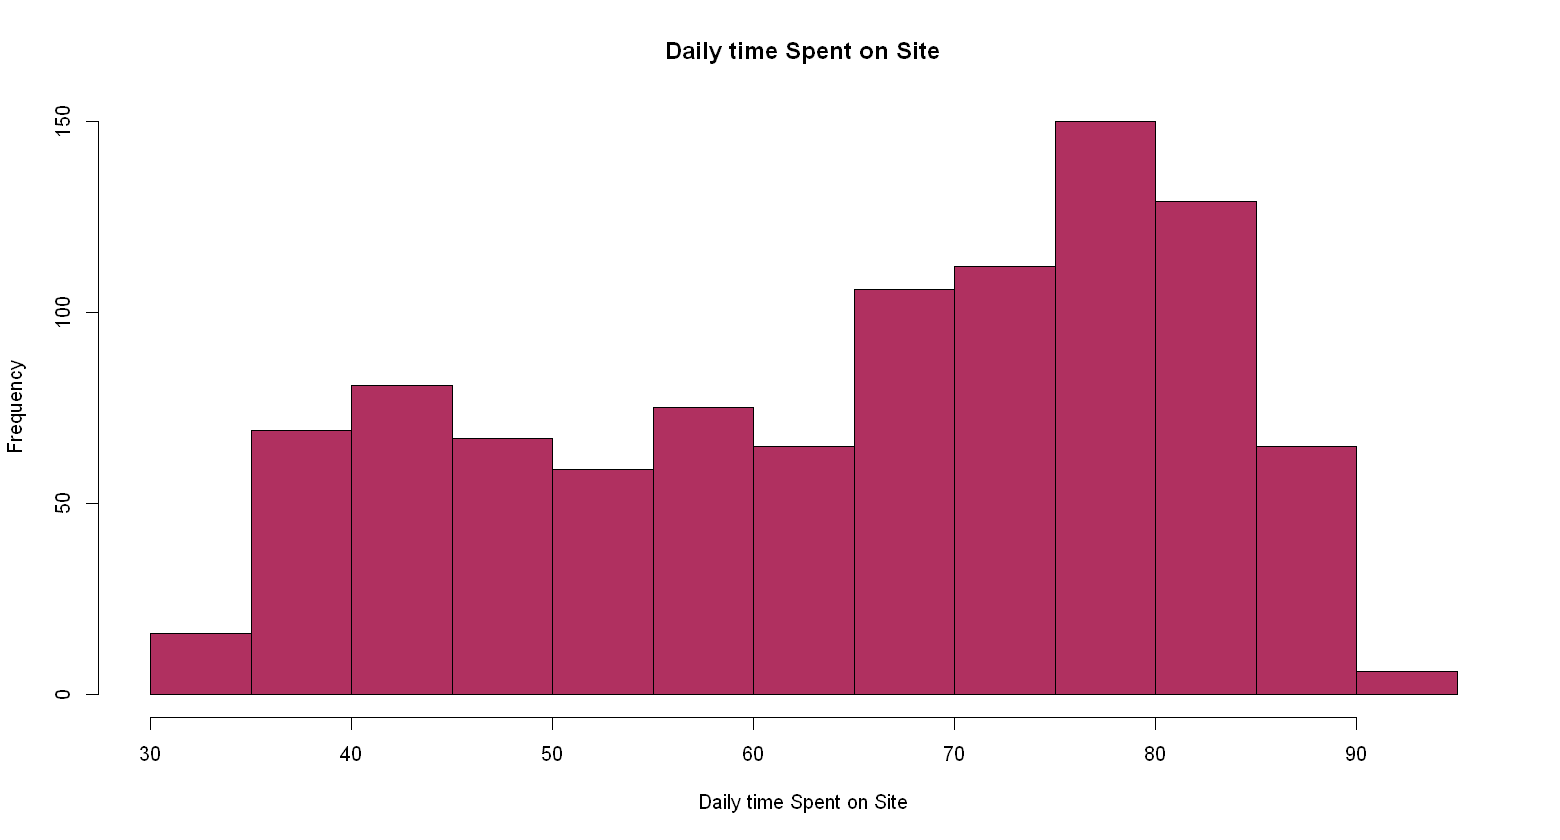

In [180]:
# Daily time spent on site distribution
#
x = hist(adv$Daily.Time.Spent.on.Site,
         main = "Daily time Spent on Site",
         xlab = "Daily time Spent on Site",
         col = "maroon"
)

The data is skewed to the right more people spend more time on the site

In [122]:
# Summary of the daily time spent on site
summary(adv$Daily.Time.Spent.on.Site)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  32.60   51.36   68.22   65.00   78.55   91.43 

We observe that maximum time spent on site is 91 minutes and the minimum time spent is 32 minutes

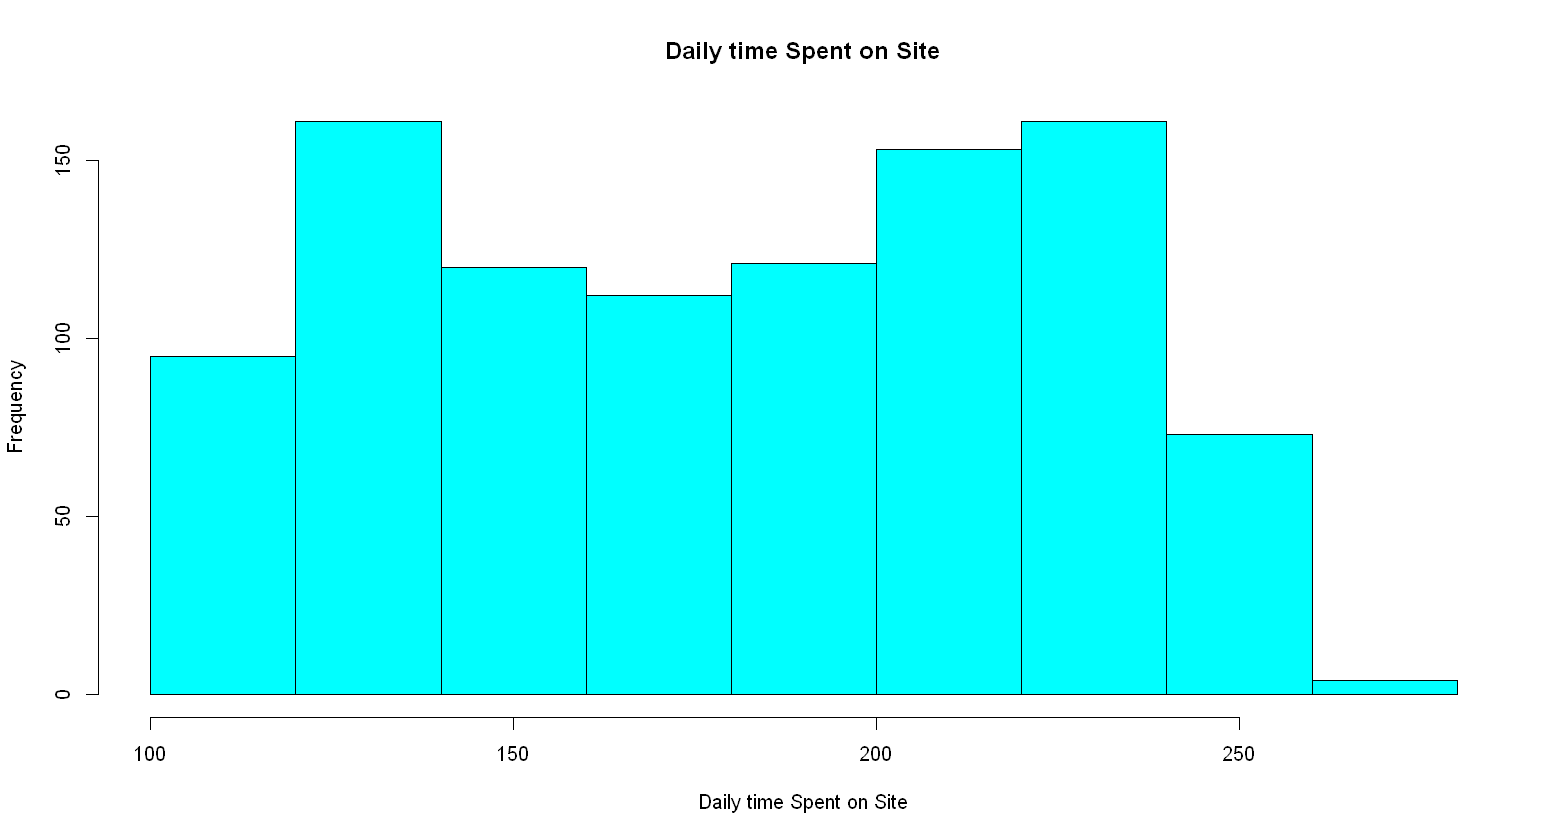

In [123]:
# Distribution of Daily Internet Usage
#
y = hist(adv$Daily.Internet.Usage,
         main = "Daily time Spent on Site",
         xlab = "Daily time Spent on Site",
         col = "cyan"
)

In [124]:
# Summary of the daily internet usage
summary(adv$Daily.Internet.Usage)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  104.8   138.8   183.1   180.0   218.8   270.0 

We observe that the average time is 180 minutes 
Maximum usage is 270 minutes and the minimum usage is 104 minutes

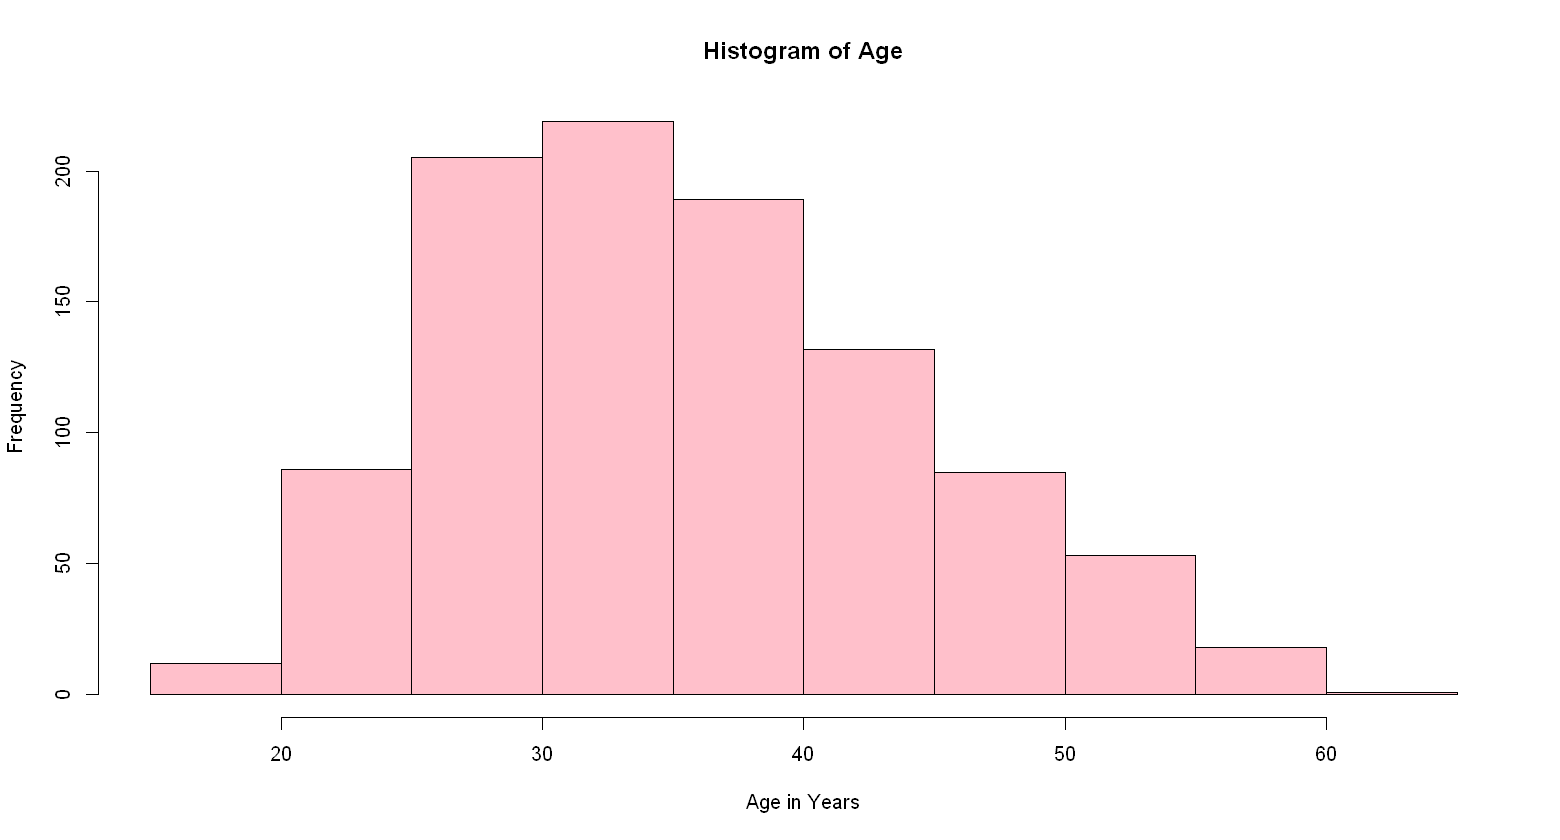

In [125]:
hist(adv$Age,
     main = "Histogram of Age",
     xlab = "Age in Years",
     col = "pink")

Most people are between age 30 and 35 with the least being above 60

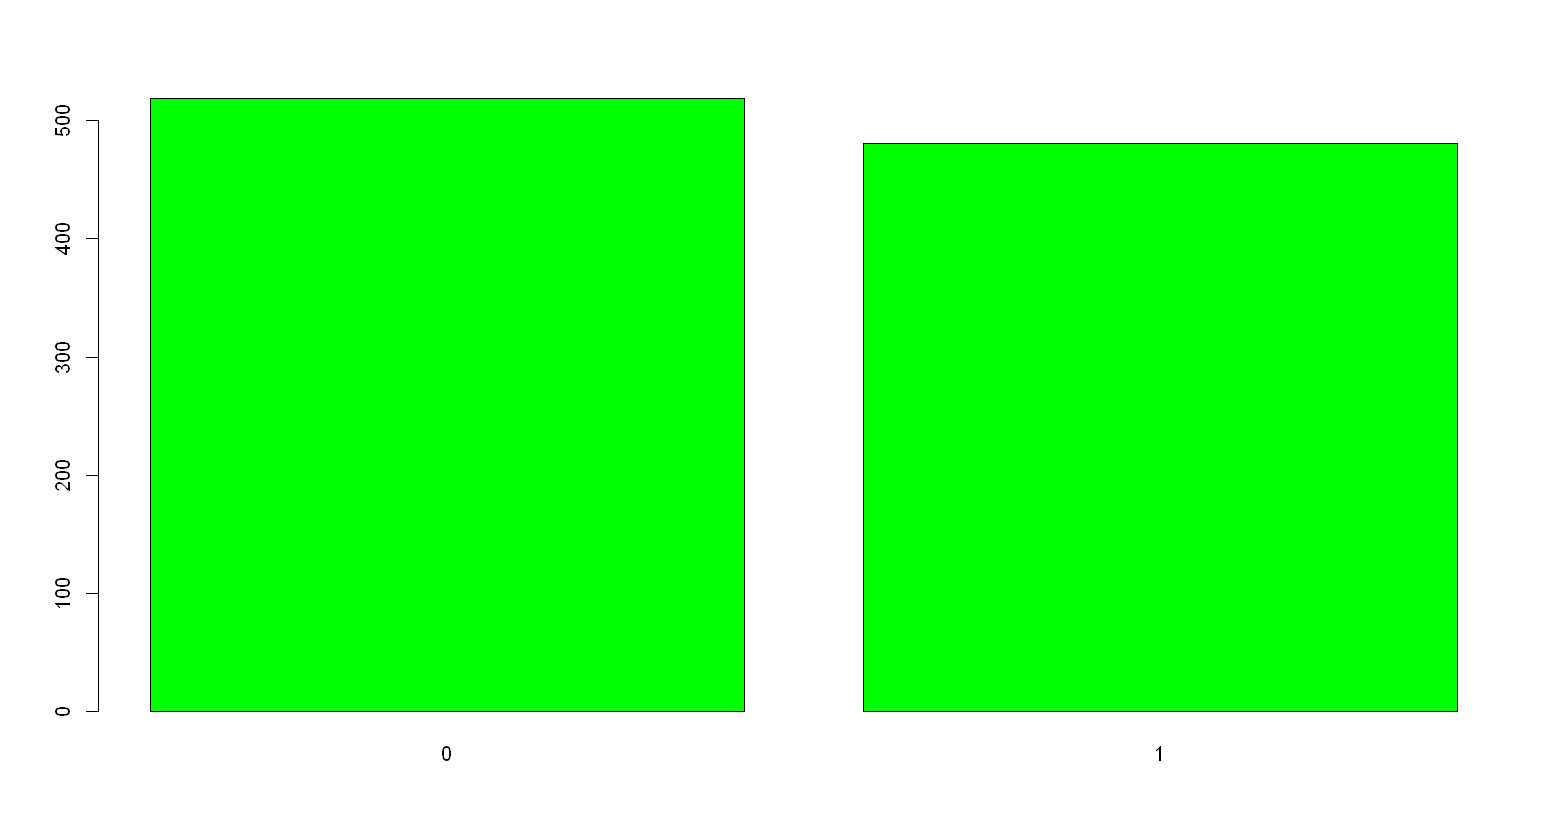

In [126]:
# Frequency table
# fetch the frequency of gender from the dataset
gender <- adv$Male
gender_freq <- table(gender)
barplot(gender_freq,
        col = "green")

The females represented by 0 are more than the males

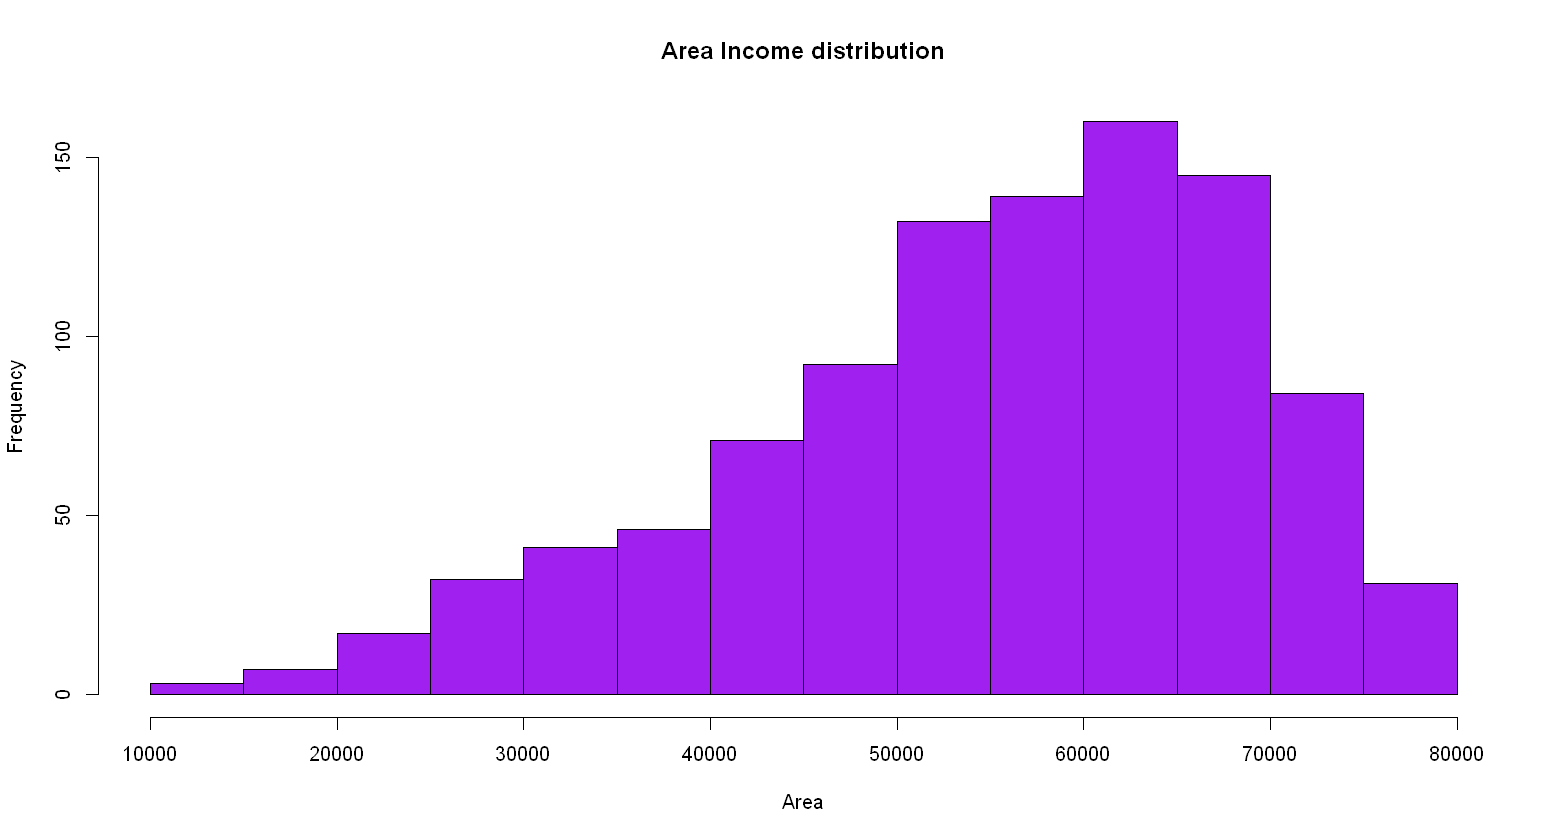

In [127]:
#Distribution of Area income
z = hist(adv$Area.Income,
         main = "Area Income distribution",
         xlab = "Area",
         col = "purple"
)

Area income is skewed to the right

###### Pie chart

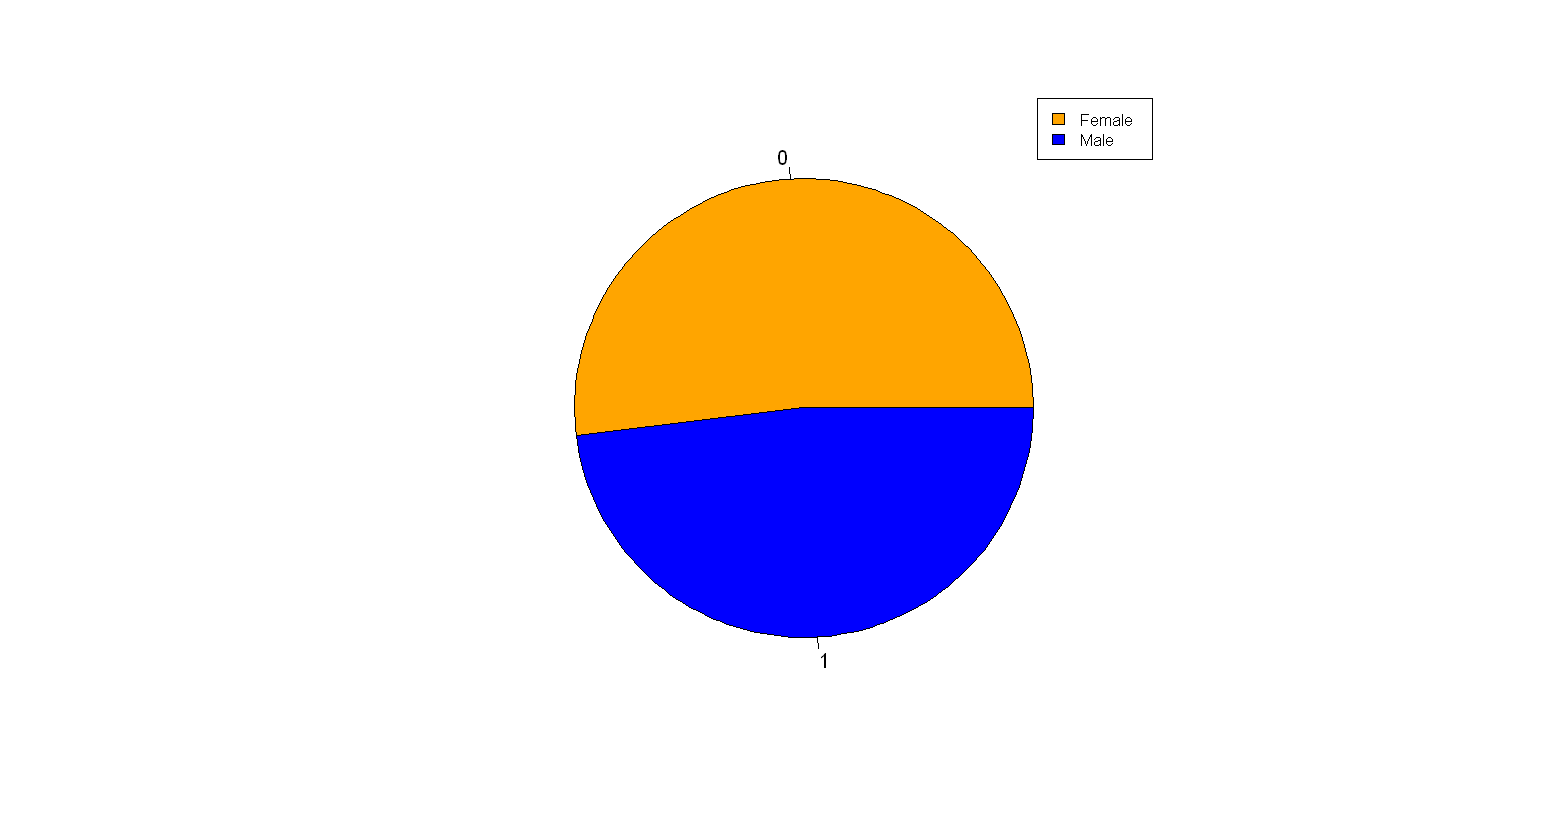

In [128]:
#Pie Chart
library(DataExplorer)

colors = c("orange", "blue")
pie(table(adv$Male), col = colors)
legend("topright", c("Female", "Male"), cex=0.8, fill = colors)

Females are more than males in our dataset

<b>Boxplots</b>

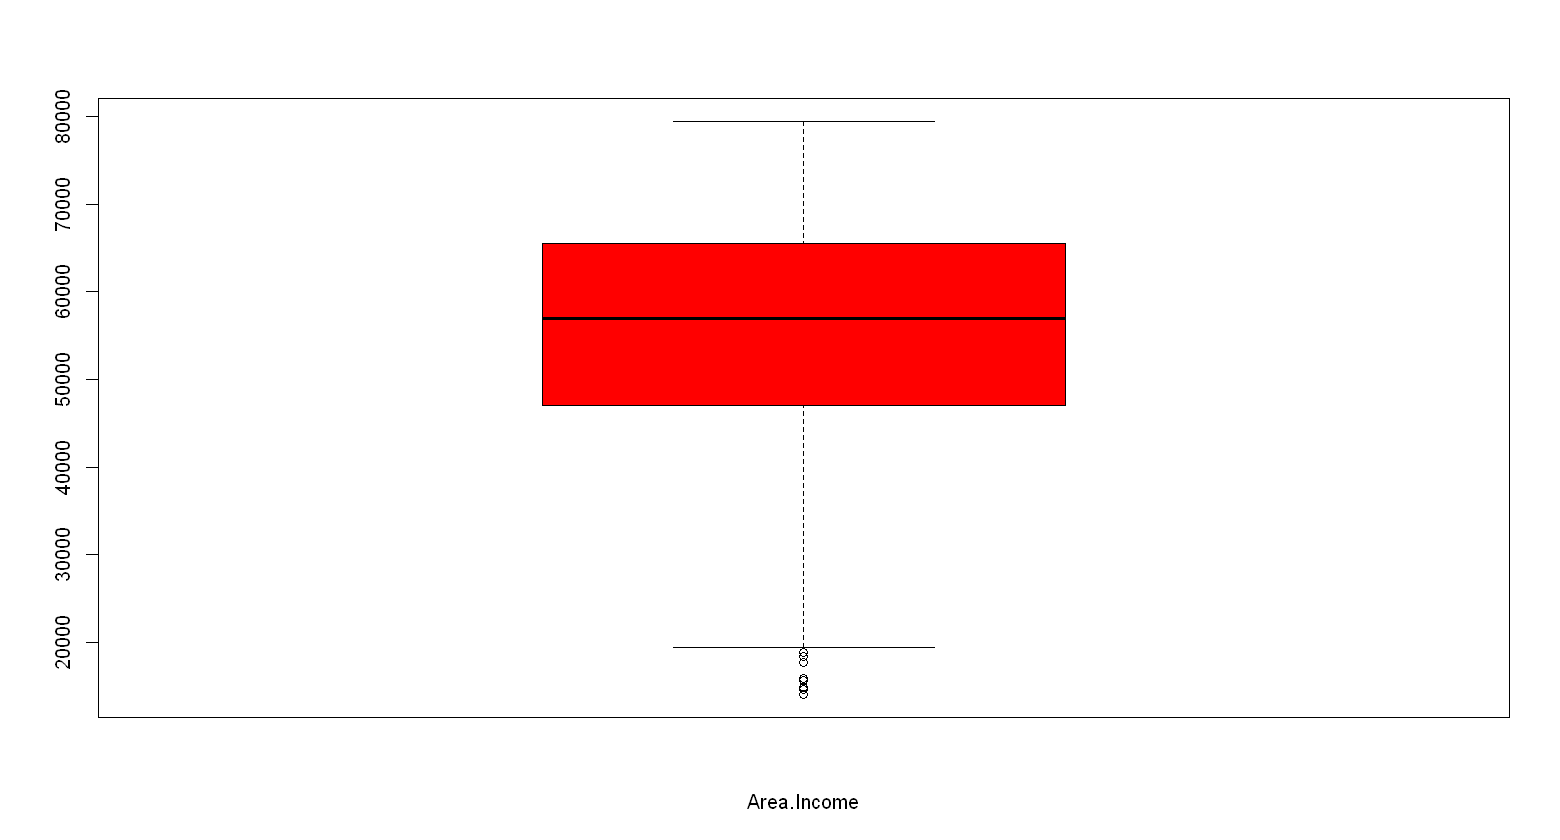

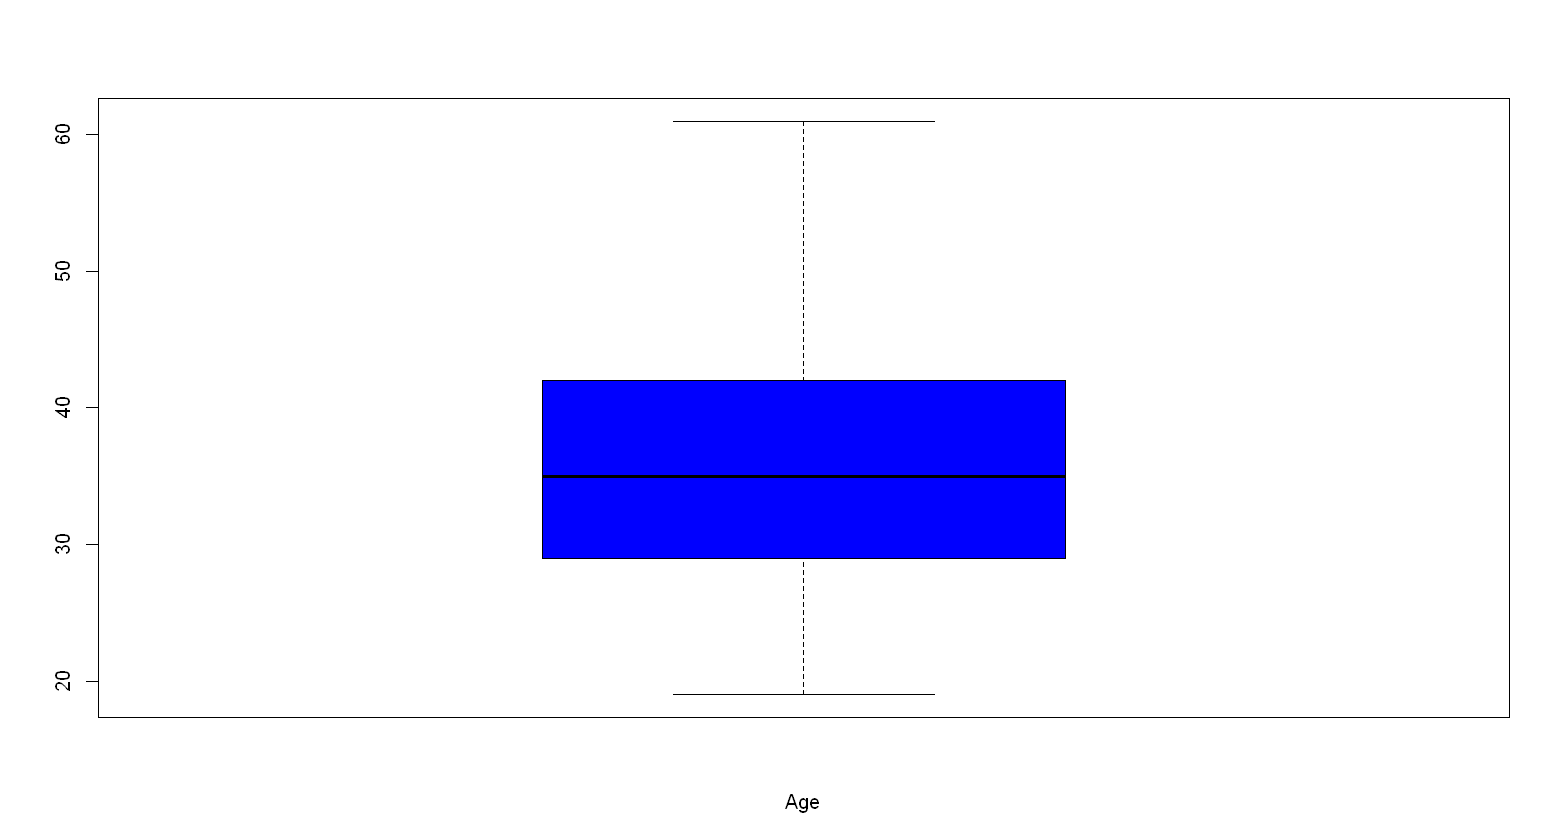

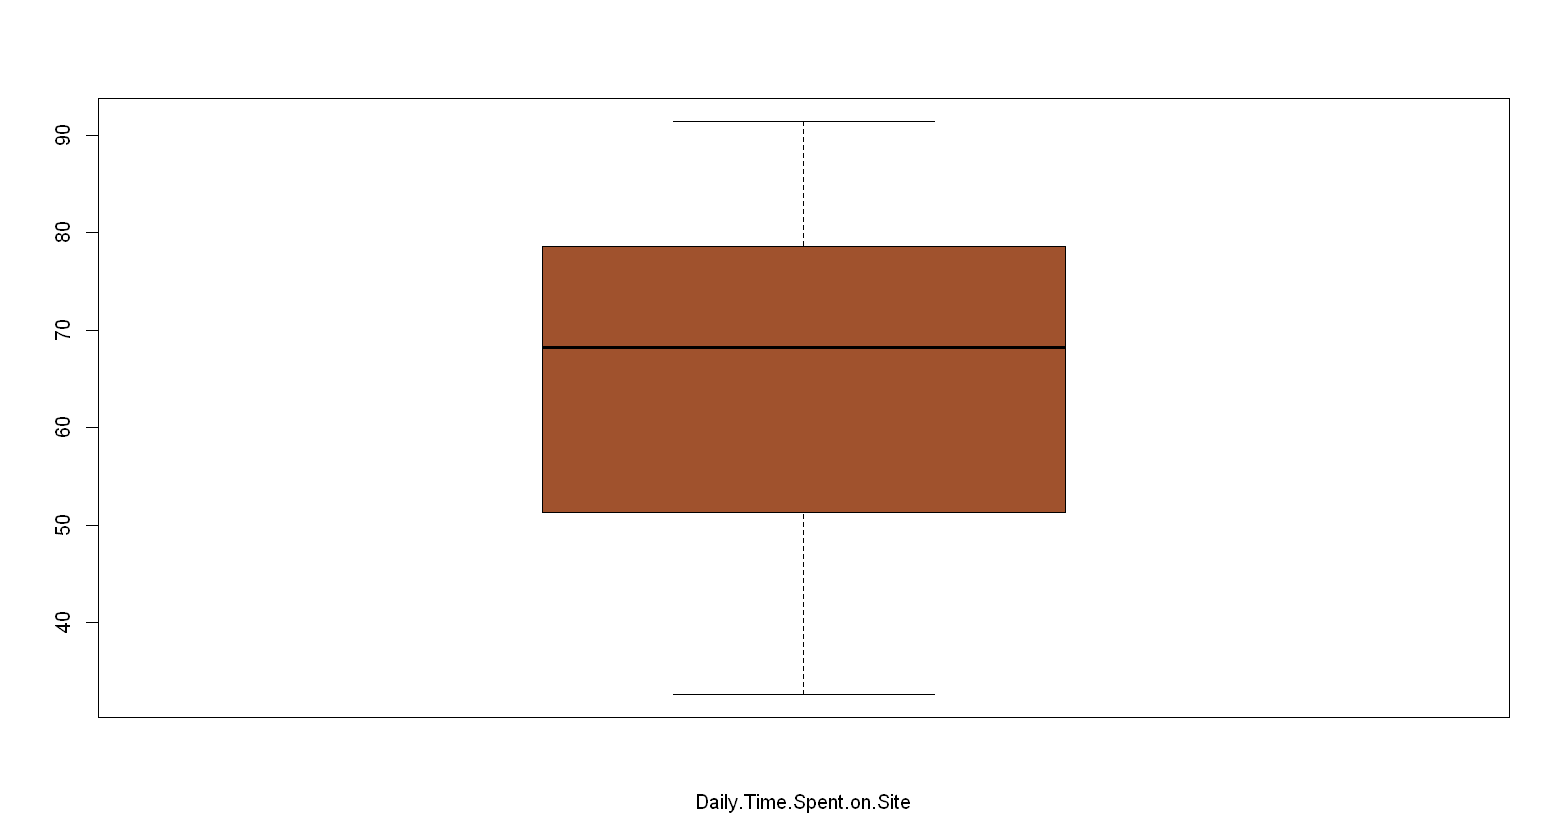

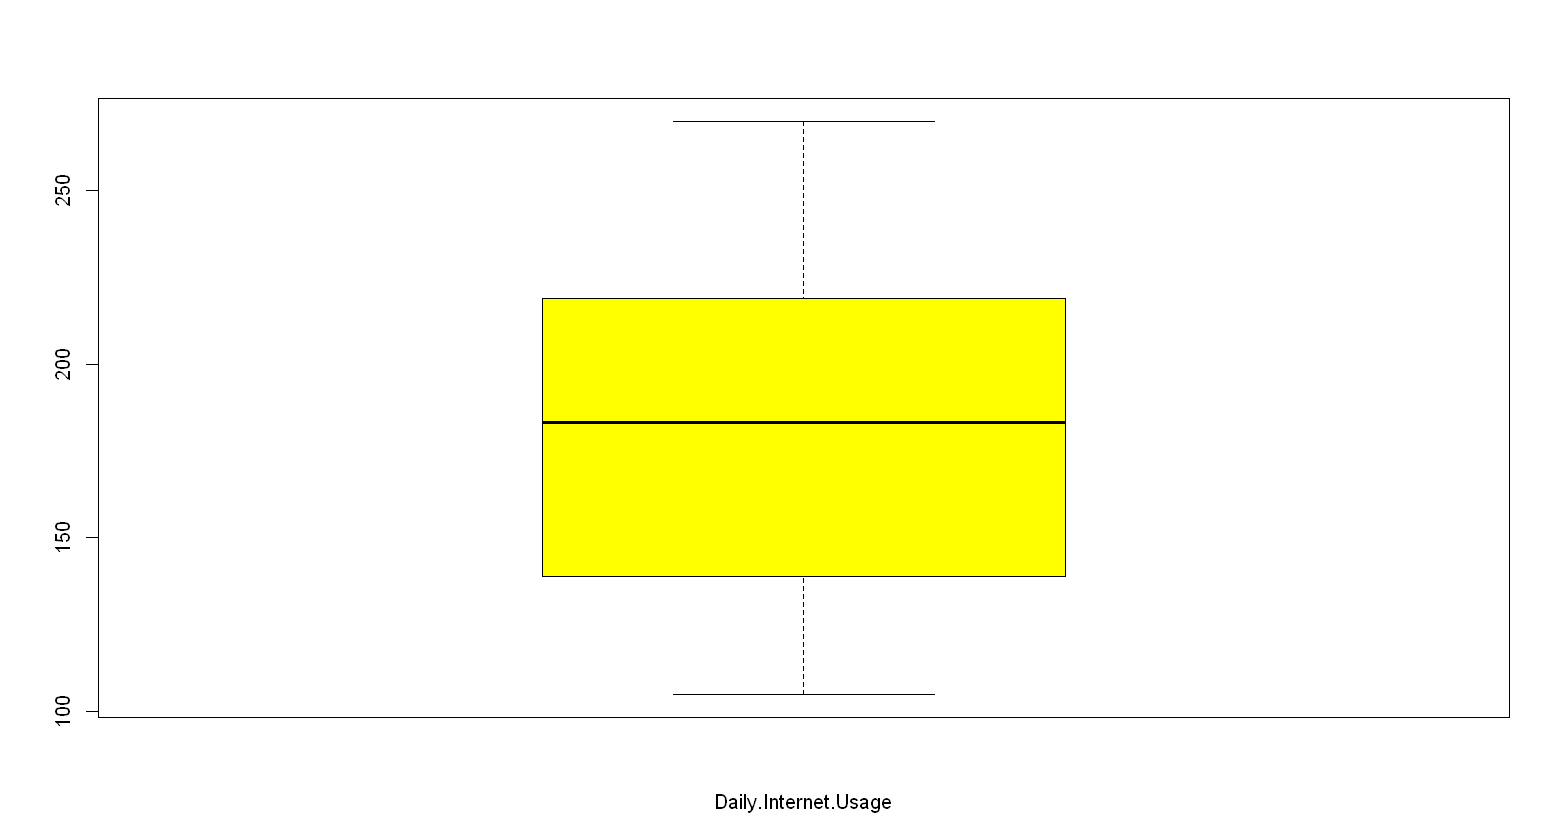

In [129]:
#checking for outliers
boxplot(adv$Area.Income,col = "red",xlab ='Area.Income')
boxplot(adv$Age,col = "blue",xlab = 'Age')
boxplot(adv$Daily.Time.Spent.on.Site,col = "sienna",xlab = 'Daily.Time.Spent.on.Site')
boxplot(adv$Daily.Internet.Usage,col = "yellow",xlab = 'Daily.Internet.Usage')

##### Bivariate Analysis

In [130]:
#subsetting the dataset to columns with numeric data
num_col <- c( "Daily.Time.Spent.on.Site", "Age" ,"Area.Income" ,"Daily.Internet.Usage","Male","Clicked.on.Ad")
num_col

[1] "Daily.Time.Spent.on.Site" "Age"                     
[3] "Area.Income"              "Daily.Internet.Usage"    
[5] "Male"                     "Clicked.on.Ad"

In [131]:
#numeric columns
num <- adv[,num_col]
head(num)

Daily.Time.Spent.on.Site,Age,Area.Income,Daily.Internet.Usage,Male,Clicked.on.Ad
68.95,35,61833.90,256.09,0,0
80.23,31,68441.85,193.77,1,0
69.47,26,59785.94,236.50,0,0
74.15,29,54806.18,245.89,1,0
68.37,35,73889.99,225.58,0,0
59.99,23,59761.56,226.74,1,0


<b>Covariance</b>

In [132]:
# checking for covariance
# covariance is a number that reflects the degree to which two variable vary together

timespent <- adv$Daily.Time.Spent.on.Site
internetusage<- adv$Daily.Internet.Usage

# Using the cov() function to determine the covariance

cov(timespent, internetusage)

[1] 360.9919

A high covariance basically indicates there is a strong relationship between the variables We have a covariance of 360 which means this two are positively highly related.

<b>Correlation</b>

In [133]:
# checking for correlation
# correlation is a normalized measurement of how the two are linearly related

timespent <- adv$Daily.Time.Spent.on.Site
internetusage<- adv$Daily.Internet.Usage

# Using the cor() function to determine the covariance

cor(timespent, internetusage)

[1] 0.5186585

<b>Scatterplot</b>

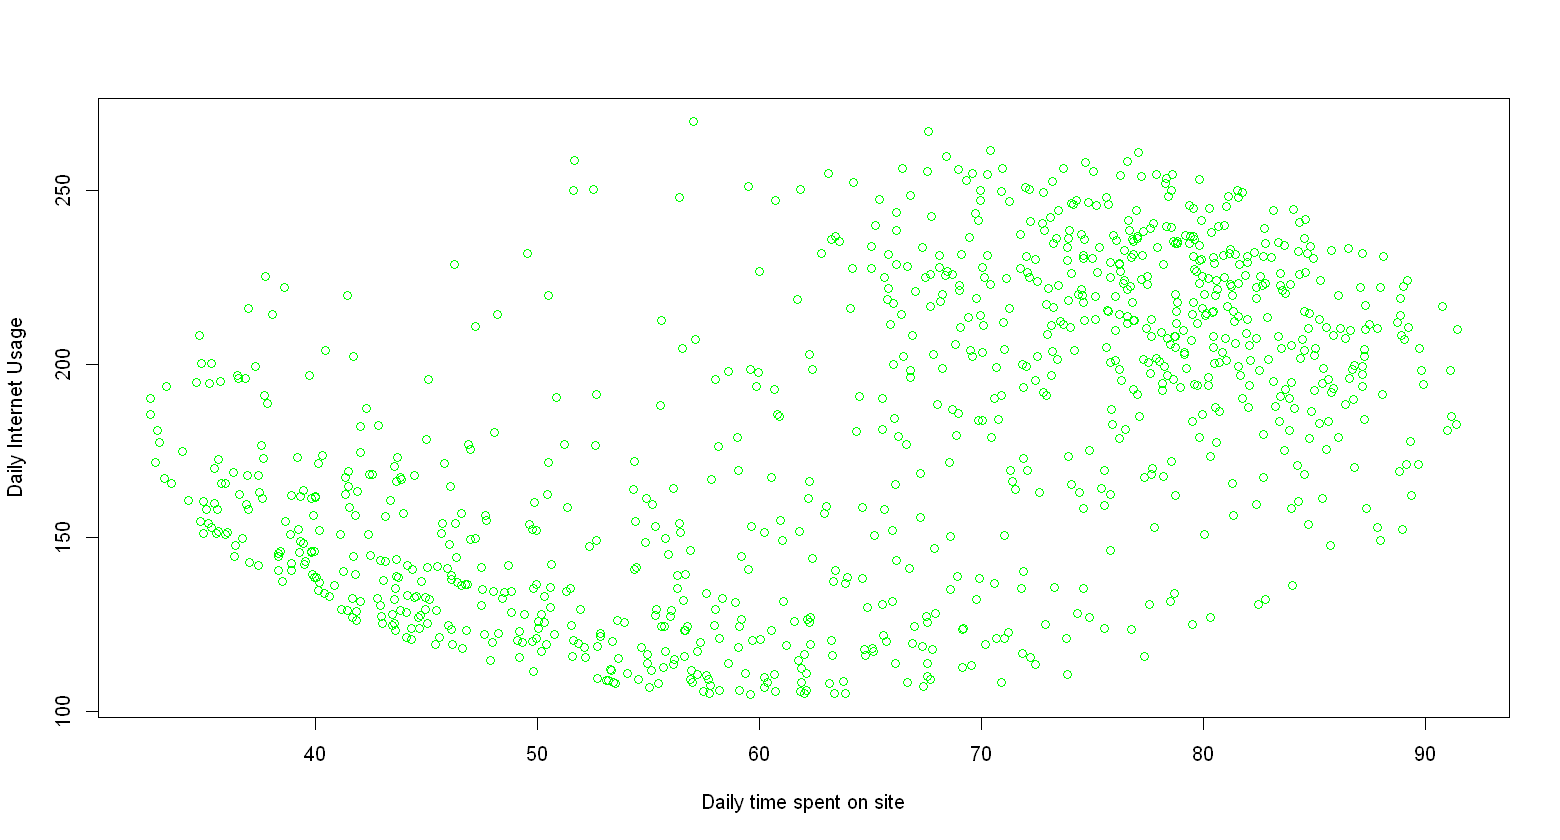

In [134]:
# Scatterplot

timespent <- adv$Daily.Time.Spent.on.Site
internetusage<- adv$Daily.Internet.Usage

plot(timespent, internetusage, xlab="Daily time spent on site", ylab="Daily Internet Usage", col = "green")


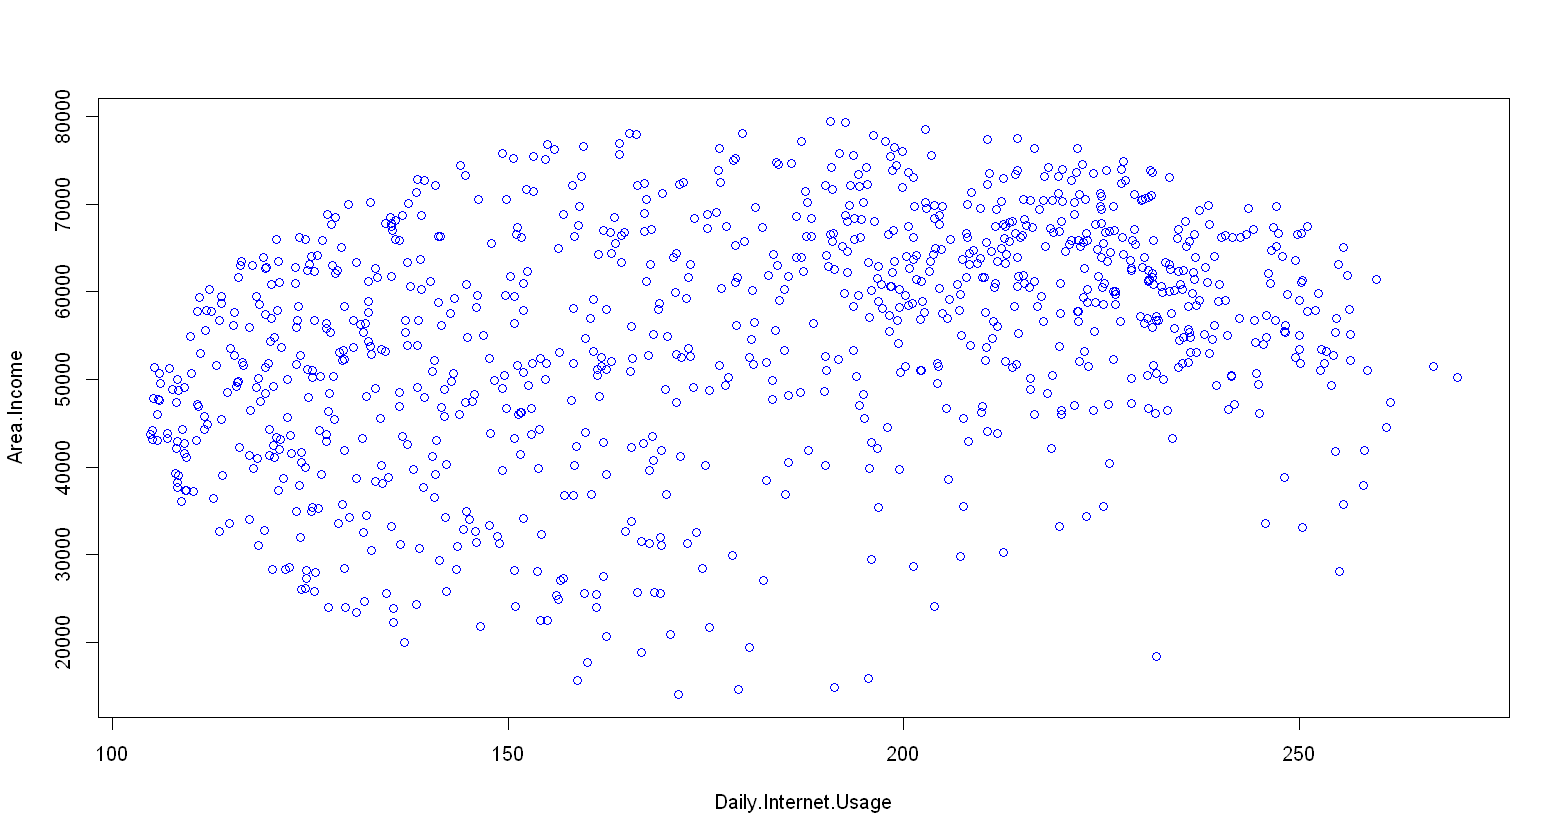

In [135]:
# Scatter plot of area income and daily internt usage
plot(Area.Income ~ Daily.Internet.Usage, data = adv, col="blue")

<b>Density Plot</b>

Warning message in pal_name(palette, type):
"Unknown palette cool"

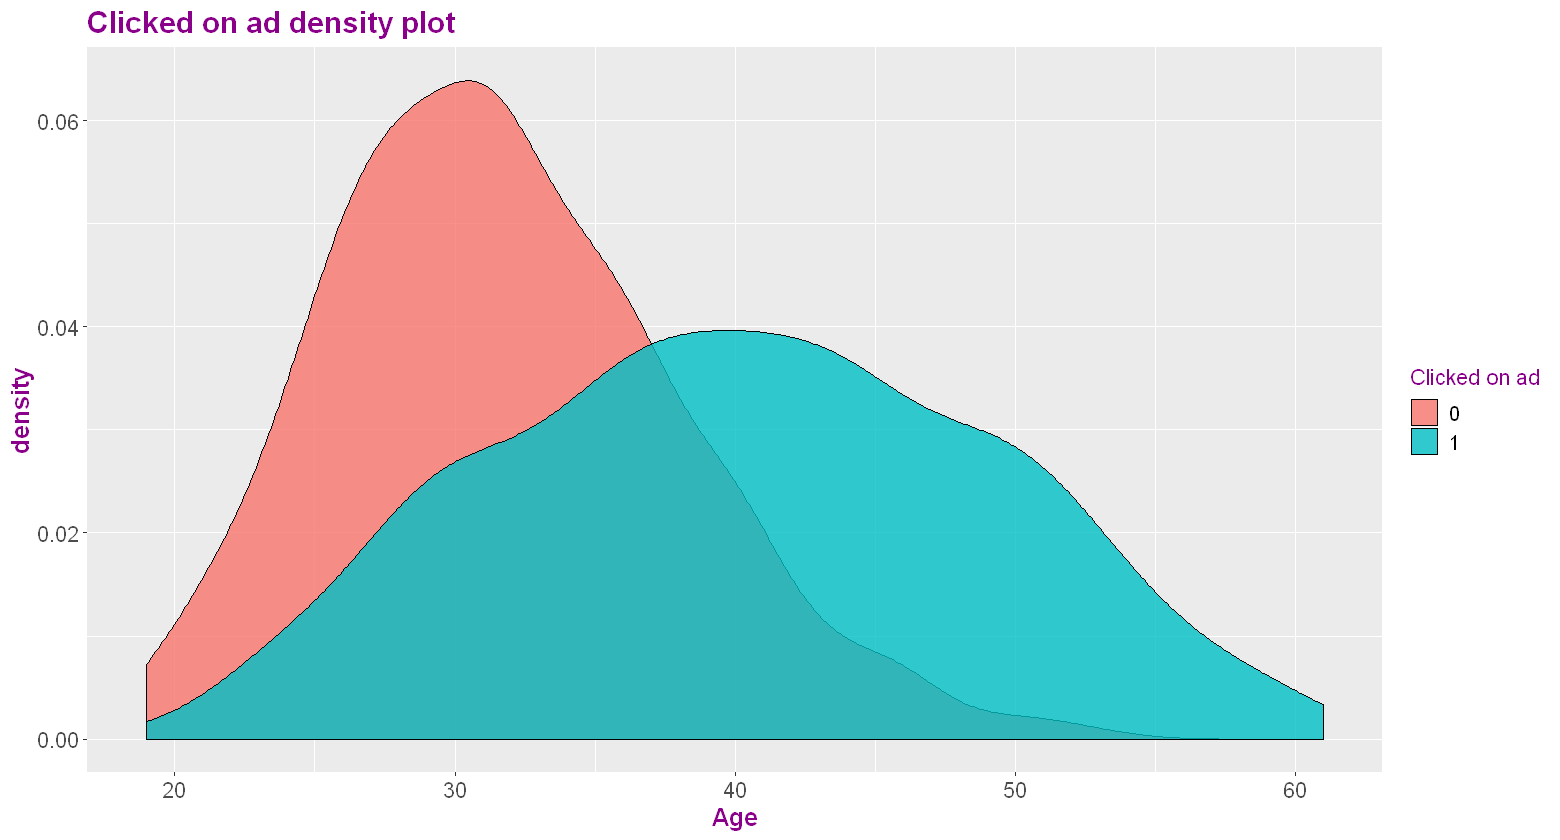

In [136]:
# Plotting density plot
library(ggplot2)
options(repr.plot.width = 13, repr.plot.height = 7)
p1 = ggplot(data = adv, aes(Age)) +
        geom_density(aes(fill=factor(Clicked.on.Ad)), alpha = 0.8) +
        labs(title = 'Clicked on ad density plot', x = 'Age', fill = 'Clicked on ad') +
        scale_color_brewer(palette = 'cool') +
        theme(plot.title = element_text(size = 18, face = 'bold', color = 'darkmagenta'),
             axis.title.x = element_text(size = 15, face = 'bold', color = 'darkmagenta'),
             axis.title.y = element_text(size = 15, face = 'bold', color = 'darkmagenta'),
             axis.text.x = element_text(size = 13, angle = 0),
             axis.text.y = element_text(size = 13),
             legend.title = element_text(size = 13, color = 'darkmagenta'),
             legend.text = element_text(size = 12))
plot(p1)



  0   1 
500 500 

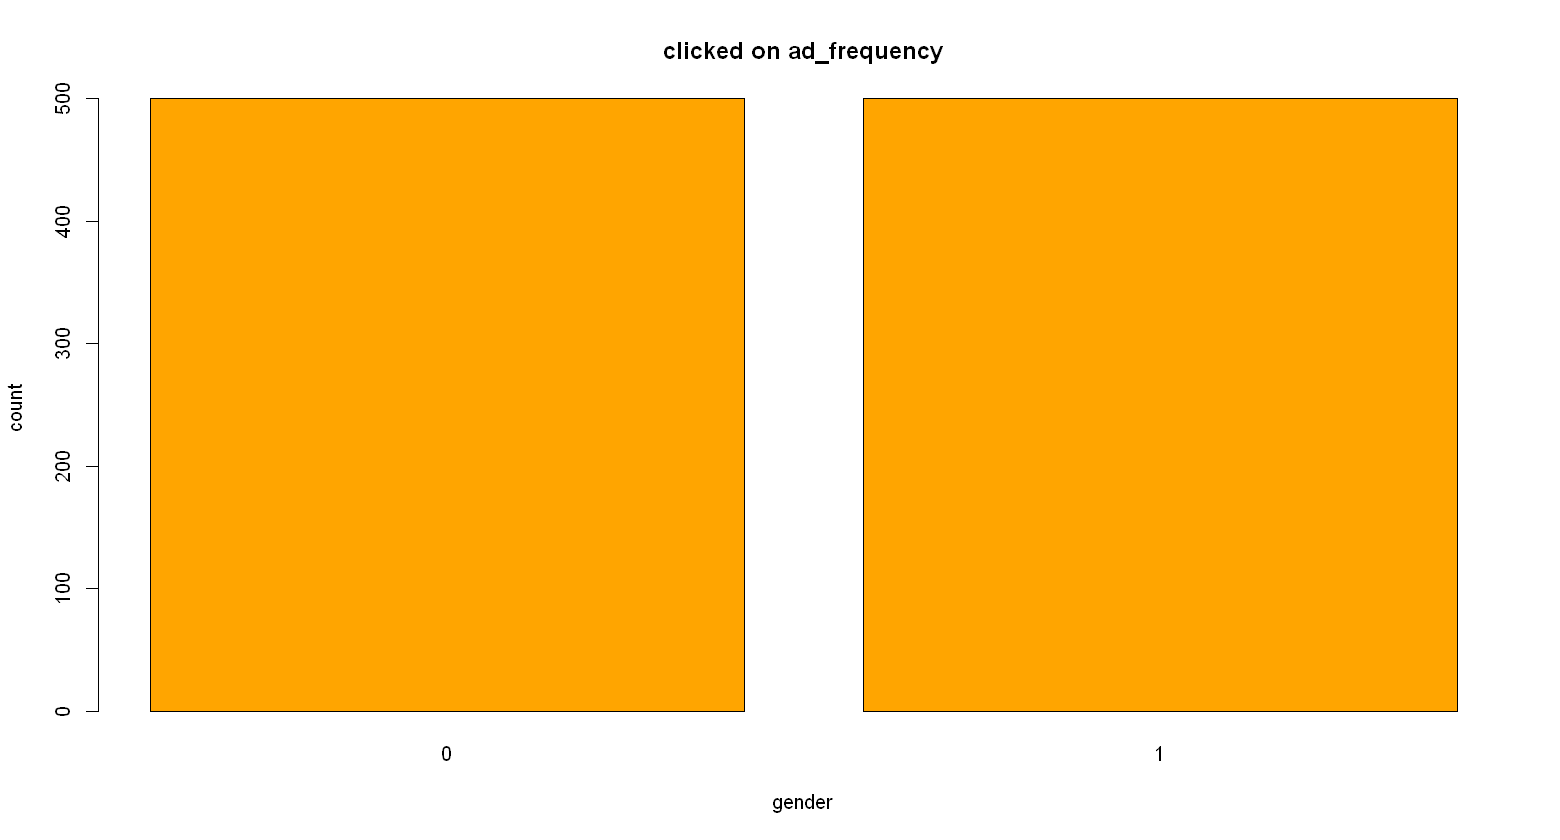

In [137]:
coad_frequency = table(adv$Clicked.on.Ad)
coad_frequency
## 
##   0   1 
## 500 500
# Barplot for clicked on ad variable.
#
bar_coad = barplot(coad_frequency,
                   main = 'clicked on ad_frequency',
                   xlab = 'gender',
                   ylab = 'count',
                   col = 'orange')


The values 0 and 1 in the variable are even. This is a perfectly balanced dataset.

<b>Frequency Polygon</b>

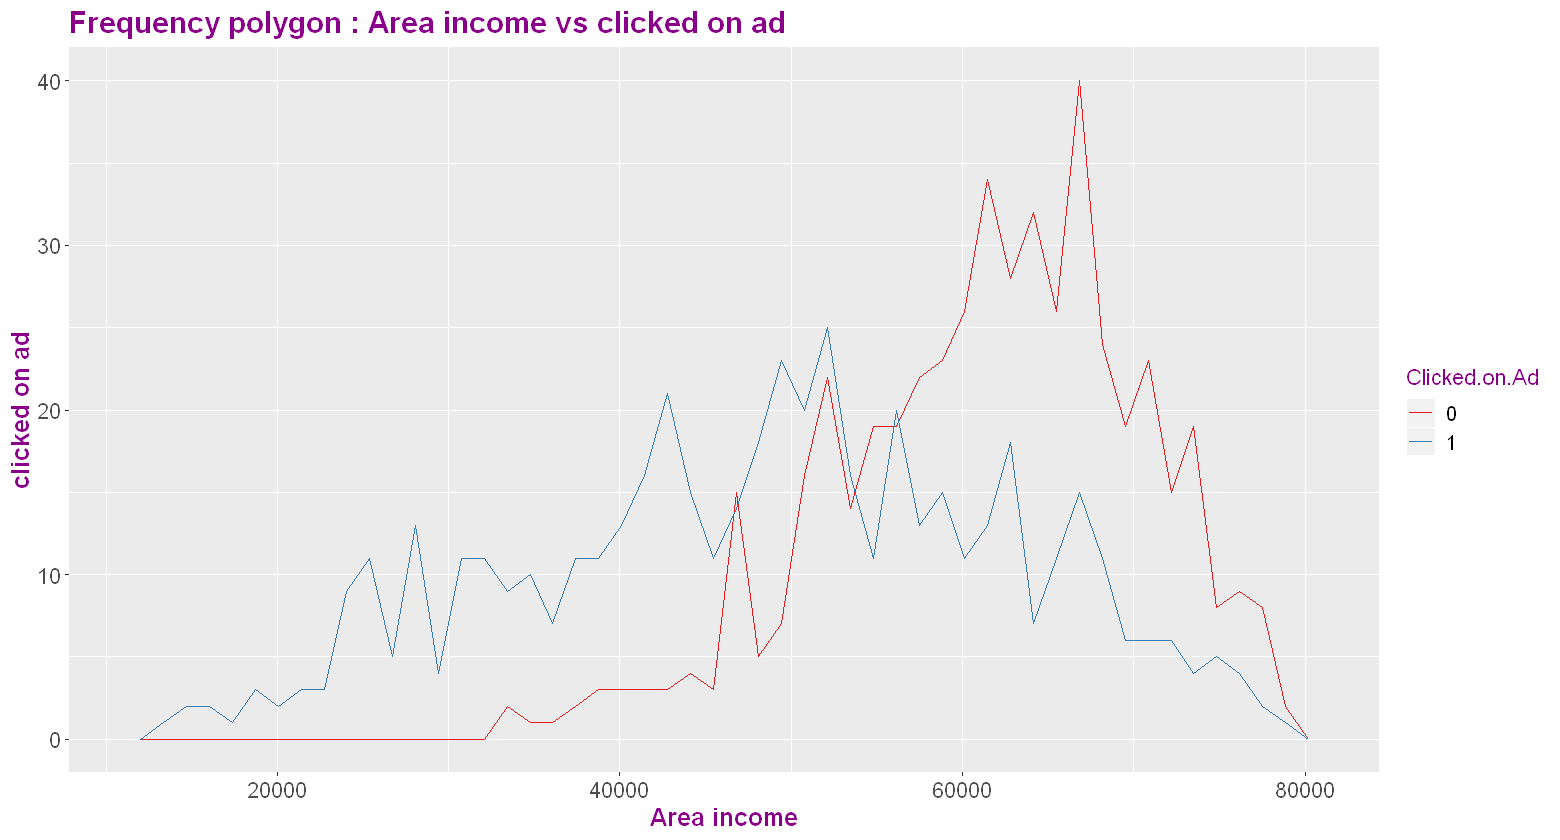

In [138]:
# Frequency polygon
library(ggplot2)
options(repr.plot.width = 13, repr.plot.height = 7)
ggplot(data = adv, aes(x = Area.Income, col = Clicked.on.Ad))+
    geom_freqpoly(bins = 50)+
    labs(title = 'Frequency polygon : Area income vs clicked on ad', x = 'Area income', y = 'clicked on ad', fill = 'Clicked on ad') +
        scale_color_brewer(palette = 'Set1') +
        theme(plot.title = element_text(size = 18, face = 'bold', color = 'darkmagenta'),
             axis.title.x = element_text(size = 15, face = 'bold', color = 'darkmagenta'),
             axis.title.y = element_text(size = 15, face = 'bold', color = 'darkmagenta'),
             axis.text.x = element_text(size = 13),
             axis.text.y = element_text(size = 13),
             legend.title = element_text(size = 13, color = 'darkmagenta'),
             legend.text = element_text(size = 12))


In [2]:
library(ggplot2)
j = ggplot(data, aes(x = Administrative , fill = Revenue))+
geom_bar(width = 0.5)
j

ERROR: Error:   You're passing a function as global data.
  Have you misspelled the `data` argument in `ggplot()`


##### Multivariate Analysis

<b>Correlation Plot</b>

In [141]:
install.packages("Hmisc")
library("Hmisc")

Installing package into 'C:/Users/lggat/OneDrive/Documents/R/win-library/3.6'
(as 'lib' is unspecified)
also installing the dependencies 'Matrix', 'png', 'jpeg', 'checkmate', 'lattice', 'survival', 'Formula', 'latticeExtra', 'cluster', 'nnet', 'acepack', 'foreign', 'htmlTable', 'viridis'




  There is a binary version available but the source version is later:
        binary source needs_compilation
foreign 0.8-75 0.8-76              TRUE

  Binaries will be installed
package 'Matrix' successfully unpacked and MD5 sums checked
package 'png' successfully unpacked and MD5 sums checked
package 'jpeg' successfully unpacked and MD5 sums checked
package 'checkmate' successfully unpacked and MD5 sums checked
package 'lattice' successfully unpacked and MD5 sums checked
package 'survival' successfully unpacked and MD5 sums checked
package 'Formula' successfully unpacked and MD5 sums checked
package 'latticeExtra' successfully unpacked and MD5 sums checked
package 'cluster' successfully unpacked and MD5 sums checked
package 'nnet' successfully unpacked and MD5 sums checked
package 'acepack' successfully unpacked and MD5 sums checked
package 'foreign' successfully unpacked and MD5 sums checked
package 'htmlTable' successfully unpacked and MD5 sums checked
package 'viridis' successf

Warning message:
"package 'Hmisc' was built under R version 3.6.3"Loading required package: lattice
Warning message:
"package 'lattice' was built under R version 3.6.3"Loading required package: survival
Warning message:
"package 'survival' was built under R version 3.6.3"Loading required package: Formula

Attaching package: 'Hmisc'

The following objects are masked from 'package:base':

    format.pval, units



In [150]:
adv.num <- num[, sapply(num, is.numeric)]
adv.cor = cor(adv.num)

In [143]:
adv.rcorr = rcorr(as.matrix(num))
adv.rcorr

                         Daily.Time.Spent.on.Site   Age Area.Income
Daily.Time.Spent.on.Site                     1.00 -0.33        0.31
Age                                         -0.33  1.00       -0.18
Area.Income                                  0.31 -0.18        1.00
Daily.Internet.Usage                         0.52 -0.37        0.34
Male                                        -0.02 -0.02        0.00
Clicked.on.Ad                               -0.75  0.49       -0.48
                         Daily.Internet.Usage  Male Clicked.on.Ad
Daily.Time.Spent.on.Site                 0.52 -0.02         -0.75
Age                                     -0.37 -0.02          0.49
Area.Income                              0.34  0.00         -0.48
Daily.Internet.Usage                     1.00  0.03         -0.79
Male                                     0.03  1.00         -0.04
Clicked.on.Ad                           -0.79 -0.04          1.00

n= 1000 


P
                         Daily.Time.Spent.on.Sit

In [144]:
install.packages("corrplot")
library(corrplot)

Installing package into 'C:/Users/lggat/OneDrive/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'corrplot' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\lggat\AppData\Local\Temp\Rtmp2ta4hf\downloaded_packages


Warning message:
"package 'corrplot' was built under R version 3.6.3"corrplot 0.84 loaded


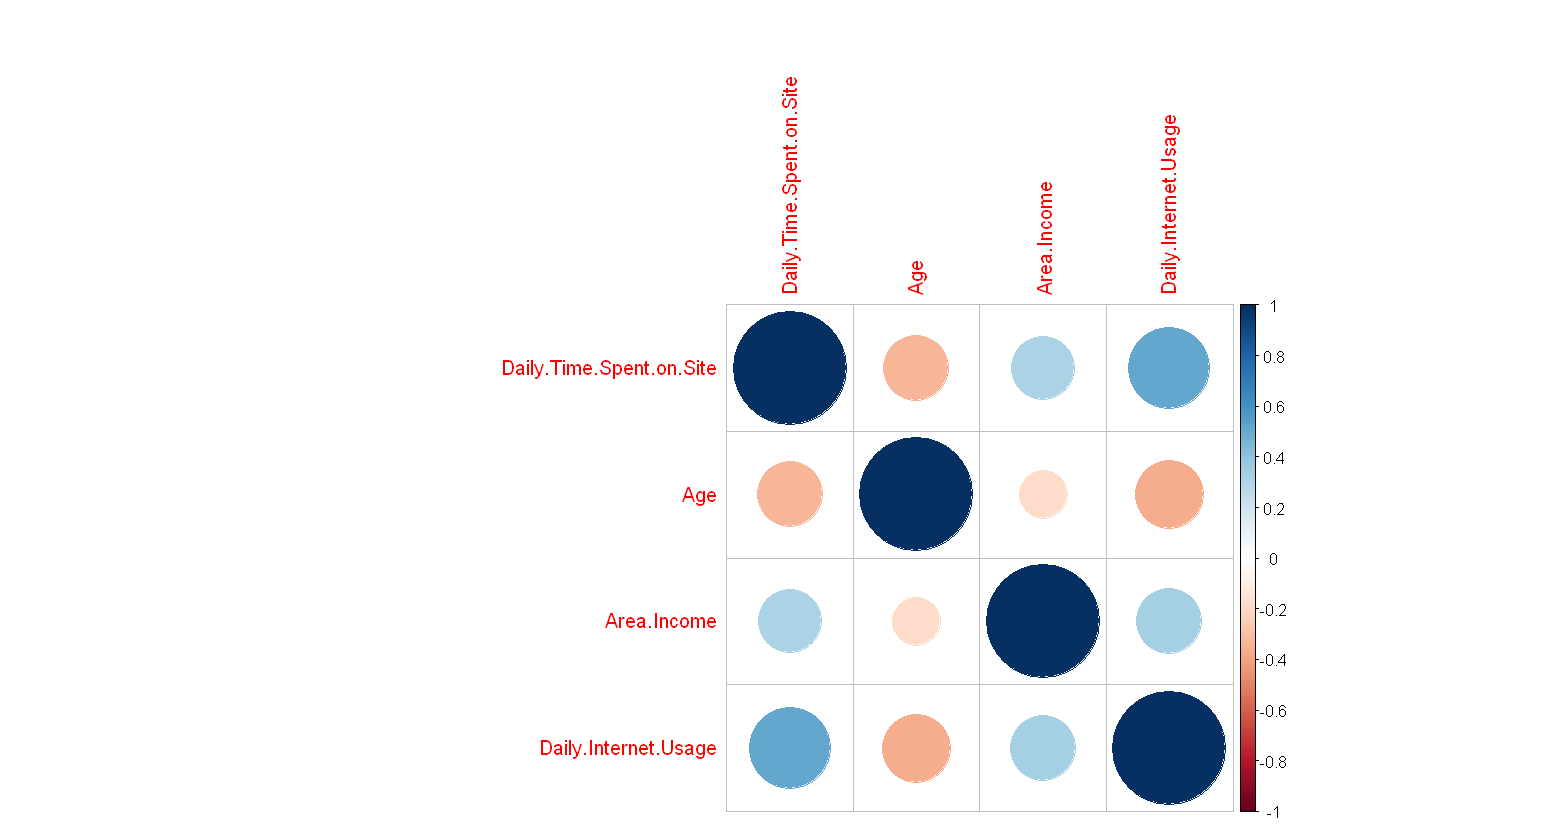

In [151]:
corrplot(adv.cor)

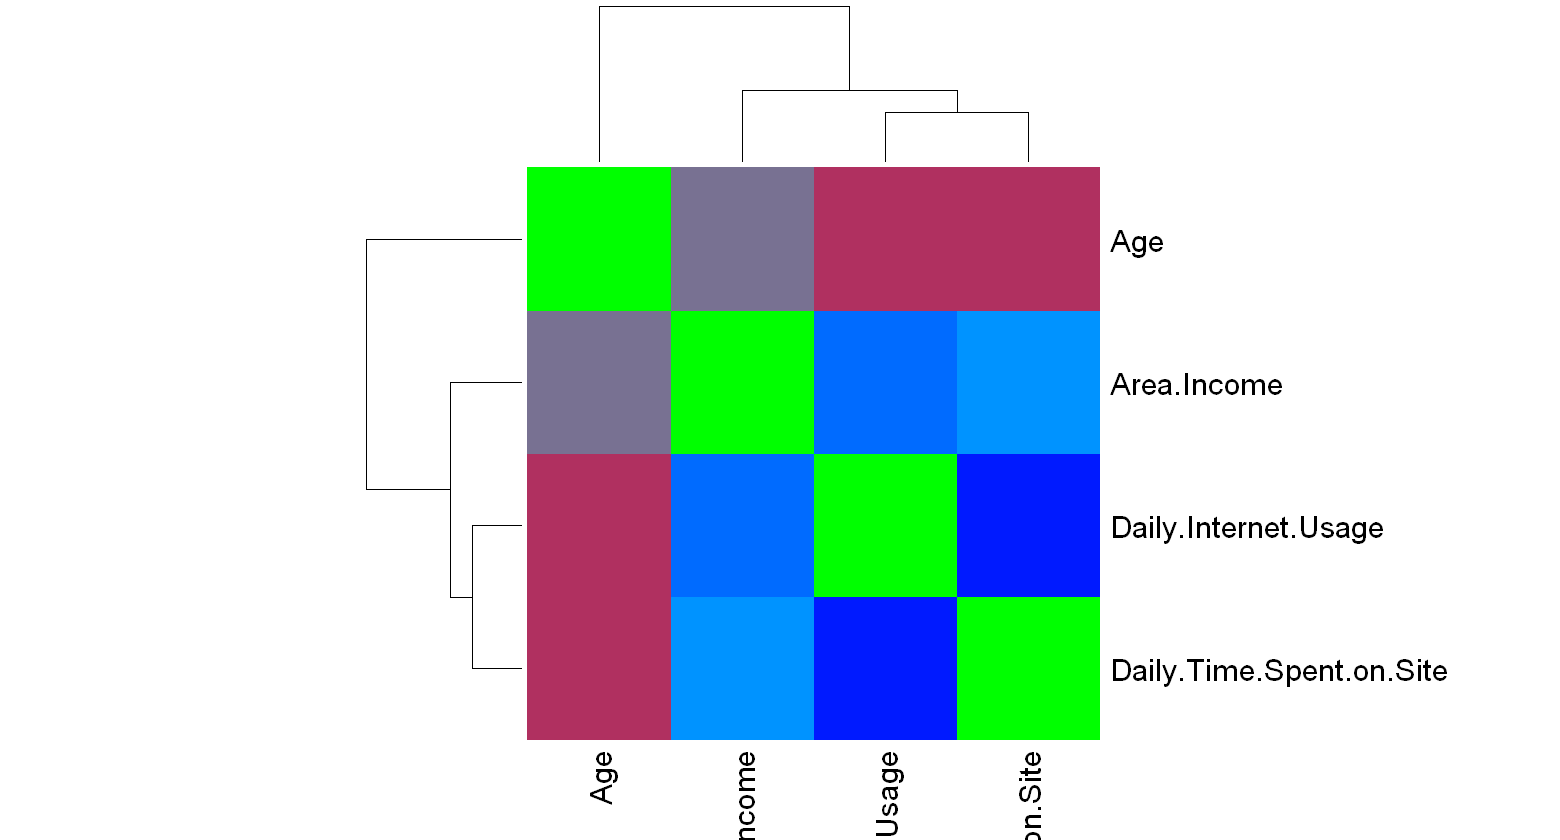

In [156]:
palette = colorRampPalette(c("maroon", "cyan", "blue", 'green')) (20)
heatmap(x = adv.cor, col = palette, symm = TRUE)

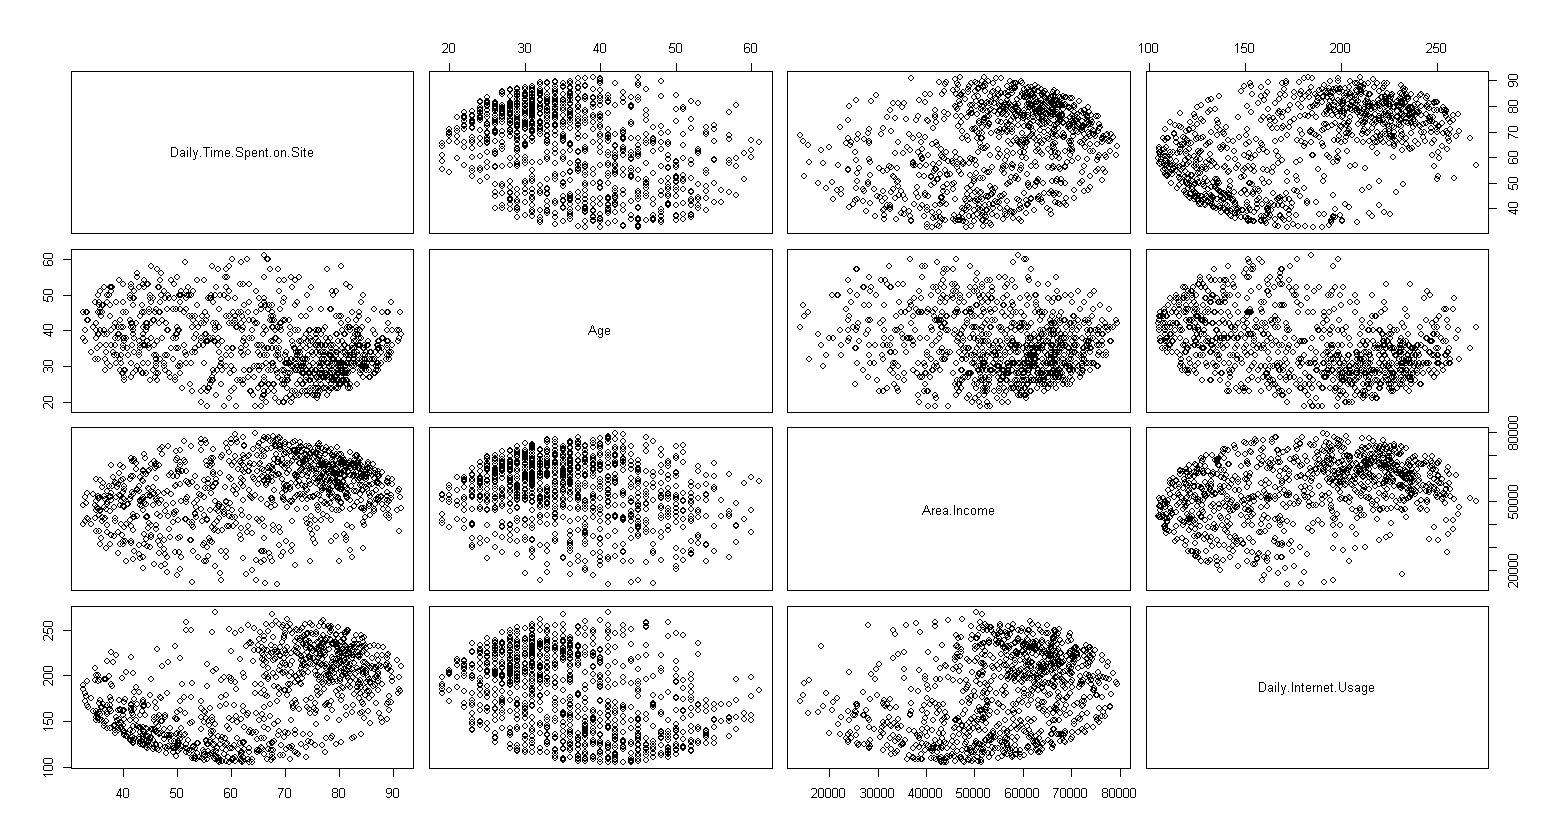

In [167]:
pairs(adv[,c(1,2,3,4)])

#### Modelling

Create a supervised learning model to help identify which individuals are most likely to click on the ads in the blog. 

In [ ]:
# subset to numerical data

# import rpart, rpart.plot
#rpart(dependet variable)

plot model.extract



In [168]:
# install rpart and rpart.plot

install.packages("rpart")
install.packages("rpart.plot")

Installing package into 'C:/Users/lggat/OneDrive/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'rpart' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'rpart'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\lggat\OneDrive\Documents\R\win-library\3.6\00LOCK\rpart\libs\x64\rpart.dll to C:\Users\lggat\OneDrive\Documents\R\win-library\3.6\rpart\libs\x64\rpart.dll: Permission denied"Warning message:
"restored 'rpart'"


The downloaded binary packages are in
	C:\Users\lggat\AppData\Local\Temp\Rtmp2ta4hf\downloaded_packages


Installing package into 'C:/Users/lggat/OneDrive/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'rpart.plot' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\lggat\AppData\Local\Temp\Rtmp2ta4hf\downloaded_packages


In [169]:
library(rpart)
library(rpart.plot)

Warning message:
"package 'rpart' was built under R version 3.6.2"Warning message:
"package 'rpart.plot' was built under R version 3.6.3"

<b>1. Using method: Class</b>

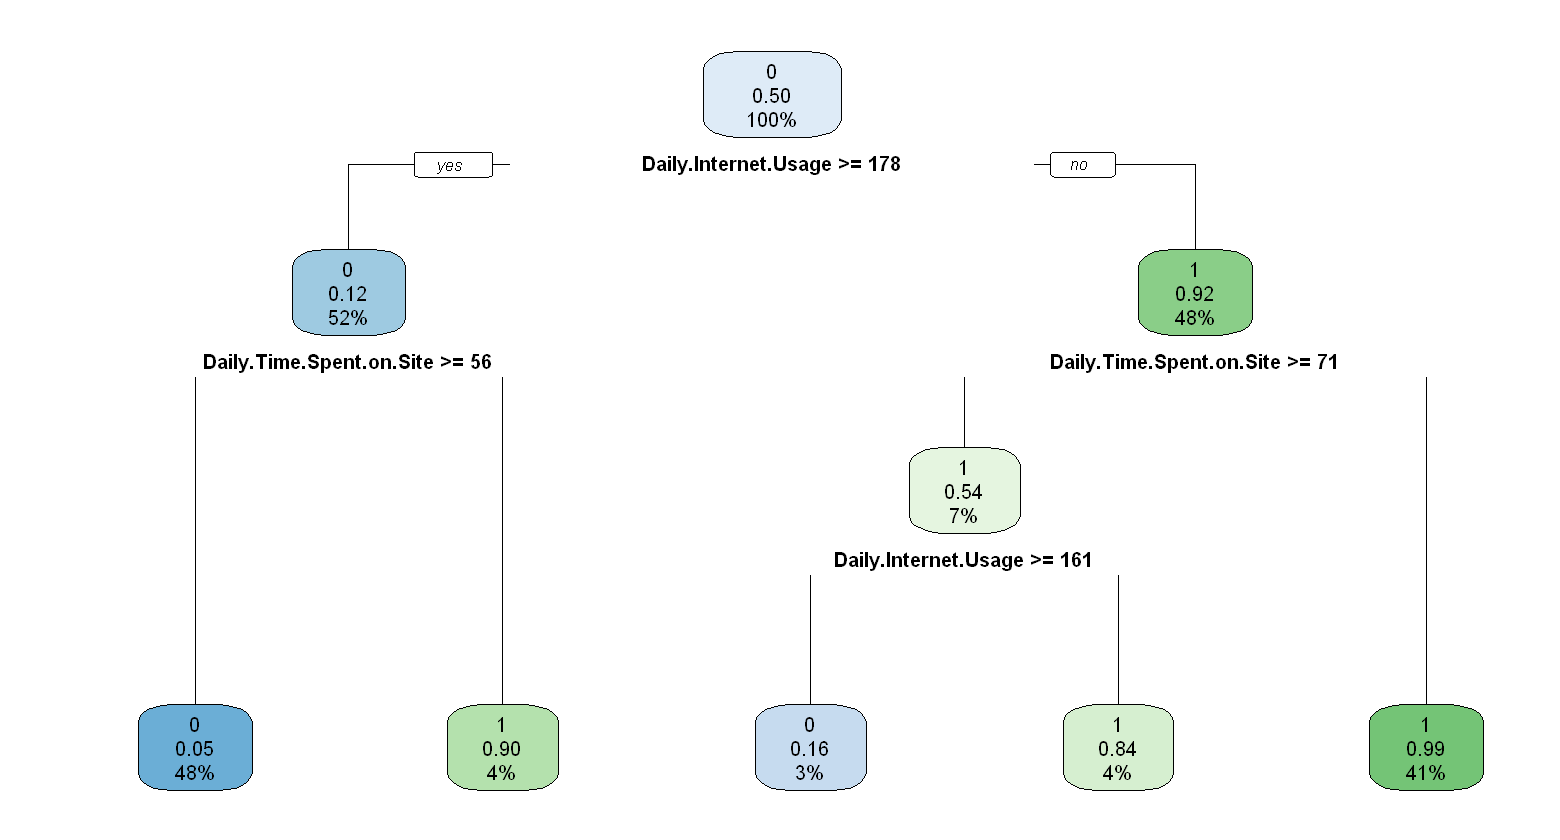

In [173]:
m <- rpart(Clicked.on.Ad ~ ., data = num,
           method = "class")

rpart.plot(m)


<b>Predicting</b>

In [175]:
p <- predict(m, num, type = "class")
table(p, num$Clicked.on.Ad)

   
p     0   1
  0 485  28
  1  15 472

<b>Accuracy</b>

In [176]:
mean(num$Clicked.on.Ad == p)

[1] 0.957

Accuracy of 95.7%